<a href="https://colab.research.google.com/github/ajaikrishn/Dog-breed-identification/blob/main/Copy_of_dog_breed_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[TRANSFER LEARNING] DOG BREED IDENTIFICATION**

**DOWNLOADING DATASET FROM KAGGLE**

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dog-breed-identification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F7327%2F861871%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T045132Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D88ea549f662eb41e5954bcf81fa063d05e1d041fd6640e5a73cebcaf53548d522b4ac7e8d89adae6e6710fa56fe817e3363cf02702c8544ef1562b3b868dfd299b5c6449e3ce5022dc6ae98f0ad3b849892700a8242663f26596bdbe2fdb139e3ce6a347e29176a7c19d4a0643675241dc16af9db833d91b2e56d7388e64797c6f8d4801662e5ef943ab63fdf22bc8a4cae1117400d43b80488ea0664d50a02f91b6dca2420f588a8870e9684d318e5fc344a4f37887abcad9011967463faec2e4e47a4715b9f74c63f3b6fa9f1c0baac3426cf974bbfeb3c7b9d0ab5bafc8eedb5290f89a409cf28cb5f5582660a828e2b2230b17ec3ee96400436992060cf2,mobilenet-v2/tensorflow2/130-224-classification/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F2604%2F3659%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T045132Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9e179dbbf3adba2becfacba8cff051ad293d931ceca6c21f431b5c70c4db5788bfbd60a189b214fd24b8c379fdd693e7a8649edd744ddd0c99634349385ade476ba28549ef2aaede6be18052d51e0b37cb03282457aa13c5fccc45f13d436064f2c8e7e436381b51d56507ff2d6a83adce75feab7dce03eeb8b0cd729e00395e6032d8c27042763202ab6d63d65a9742a64ac154e1b3f1222e9f0027ff24ba8c791ddc148e427cb8d21c06661211558fd4d16187bd1f939731e8afda224d678920afa3e16138d77395ee5eccf6a18b3ce93ab01145e6e02d85e51a43d1edbc4b7eccdd85f1ea26f376addd44f252486c9646bfa95ae7d988cc964241cb363b60'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 724495926 bytes downloaded
Downloaded and uncompressed: dog-breed-identification
[==================================================] 20339195 bytes downloaded
Downloaded and uncompressed: mobilenet-v2/tensorflow2/130-224-classification/1
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**IMPORTING LIBRARIES**

In [ ]:


# libraries' import
import os
import pandas as pd
import numpy as np
import datetime
import random

import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as tfk
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



In [ ]:
# labels dataframe preparation
labels=pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [ ]:
labels.sample(5)

,id,breed
6514,a410a7107470eae5f8d6ebf741e6c5a8,irish_setter
4676,7521421e092333c78d6b9dc2e189e659,toy_terrier
9811,f6e3a909254785d410b2418647034a5a,pug
624,0f378abee01a23bc9e651753300a9a36,welsh_springer_spaniel
6867,ac63a26c445b5e7c92bbd09b1abe1673,border_terrier


In [ ]:
# how many breeds do we have in the dataset?
len(labels['breed'].unique())

120

In [ ]:
# which dog breed does have more pictures?
breed = labels.groupby(by='breed').agg({'id':'count'})
breed.sort_values(by='id', ascending=False).head(10)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


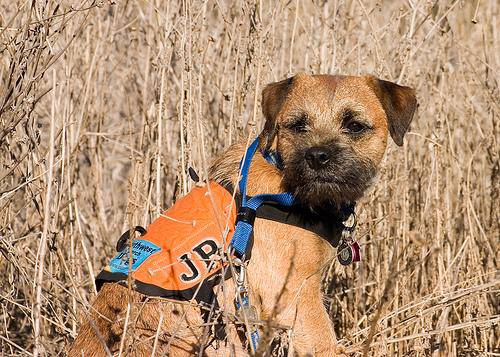

In [ ]:
# one sample of pictures
Image('/kaggle/input/dog-breed-identification/train/2796546b6e0e5e25f200df4b79ef0099.jpg')

In [ ]:
# create a list of filenames
filenames = ['/kaggle/input/dog-breed-identification/train/' + fname + '.jpg' for fname in labels['id'] ]
len(filenames)

10222

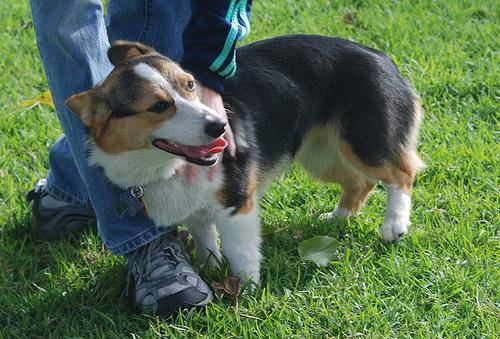

In [ ]:
Image(filenames[1131])

In [ ]:
# check the number of pictures to compare with filenames list
if len(os.listdir('/kaggle/input/dog-breed-identification/train')) == len(filenames):
    print('Great!, one step more to be sure that we have matched data')
else:
    print('check train folder')


Great!, one step more to be sure that we have matched data


In [ ]:
# general X and y preparation
X = filenames
y = labels['breed']

In [ ]:
# One Hot Encoding for dogs breeds (y)
y = pd.get_dummies(y)
encoding_labels = y.columns
y=y.to_numpy()

In [ ]:
# create a smaller dataset for exmperiments (~1000)
number_i = 1000
X_train, X_val, y_train, y_val = train_test_split(X[:number_i], y[:number_i], test_size=0.2)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

## **Preprocessing images (turning images into tensors)**

In [ ]:
# parameters for image and batch size
img_size = 224
batch_size = 32

In [ ]:
def prepare_image(image_path):
    '''
    turns an image into a tensor
    '''
    # read an image
    image = tf.io.read_file(image_path)
    # turn an image to numerical version
    image = tf.image.decode_jpeg(image, channels=3)
    # convert colours from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    # resize
    image = tf.image.resize(image, size=[img_size, img_size])

    return image

In [ ]:
def get_label_image(image_path, label):
    image = prepare_image(image_path)

    return image, label

In [ ]:
def create_batches(X, y=None, batch_size=batch_size, valid_data=False, test_data=False):
    '''
    split a dataset to batches
    '''
    if test_data:
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        data_batch = data.map(prepare_image).batch(batch_size)
    elif valid_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data.map(get_label_image).batch(batch_size)
    else:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data = data.shuffle(buffer_size=len(X))
        data_batch = data.map(get_label_image).batch(batch_size)

    return data_batch

In [ ]:
# create batches

# train data
train_data = create_batches(X_train, y_train)

# test data
valid_data = create_batches(X_val, y_val, valid_data=True)

In [ ]:
# model parameters
input_shape = [None, img_size, img_size, 3]
output_shape = len(encoding_labels)
model_url = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

# number of epochs for training
num_epochs = 20

In [ ]:
# load a tensorboard for callbacks
%load_ext tensorboard

In [ ]:
# callbacks preparation
def create_tf_callback():
    logdir = os.path.join('/kaggle/working/',
                         datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

    return tf.keras.callbacks.TensorBoard(logdir)

# early stopping for callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                            patience=3)



In [ ]:
# a function for model creation
def create_model(input_shape=input_shape, output_shape=output_shape, model_url=model_url):
    print('create a model with: ', model_url)

    # setup the model
    model = tfk.Sequential([
        hub.KerasLayer(model_url),
                       tfk.layers.Dense(units=output_shape, activation='softmax')
                       ])

    # compile the model
    model.compile(
        loss=tfk.losses.CategoricalCrossentropy(),
        optimizer=tfk.optimizers.Adam(),
        metrics=['accuracy']
    )

    # build the model
    model.build(input_shape)

    return model

In [ ]:
# build a function for train model
def train_model():
    # model creation
    model = create_model()

    # create a new tensorboard
    tensorboard = create_tf_callback()

    # model training
    model.fit(x=train_data,
          epochs=num_epochs,
          validation_data=valid_data,
          validation_freq=1,
          callbacks=[tensorboard, early_stopping]
         )

    return model


**Model preparation**

In [ ]:
model = train_model()
print('\nModel Summary:')
model.summary()

create a model with:  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1


Layer ModuleWrapper was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


Epoch 1/20
25/25 [==============================] - 30s 188ms/step - loss: 4.5644 - accuracy: 0.0988 - val_loss: 3.3929 - val_accuracy: 0.2400
Epoch 2/20
25/25 [==============================] - 2s 74ms/step - loss: 1.6227 - accuracy: 0.6800 - val_loss: 2.1444 - val_accuracy: 0.4650
Epoch 3/20
25/25 [==============================] - 3s 102ms/step - loss: 0.5542 - accuracy: 0.9362 - val_loss: 1.6825 - val_accuracy: 0.5950
Epoch 4/20
25/25 [==============================] - 2s 75ms/step - loss: 0.2500 - accuracy: 0.9875 - val_loss: 1.4760 - val_accuracy: 0.6350
Epoch 5/20
25/25 [==============================] - 2s 63ms/step - loss: 0.1451 - accuracy: 0.9987 - val_loss: 1.4017 - val_accuracy: 0.6400
Epoch 6/20
25/25 [==============================] - 2s 62ms/step - loss: 0.1000 - accuracy: 0.9987 - val_loss: 1.3653 - val_accuracy: 0.6550
Epoch 7/20
25/25 [==============================] - 2s 77ms/step - loss: 0.0750 - accuracy: 1.0000 - val_loss: 1.3353 - val_accuracy: 0.6450
Epoch 8/20

In [ ]:
 #%tensorboard --logdir /kaggle/working

In [ ]:
y_pred = model.predict(valid_data)

7/7 [==============================] - 1s 48ms/step


In [ ]:
# function for encoding labels
def pred_labels(prediction_propabilities):

    return encoding_labels[np.argmax(prediction_propabilities)]

Is scottish_deerhound predicted properly? Prediction: pomeranian. So:  False



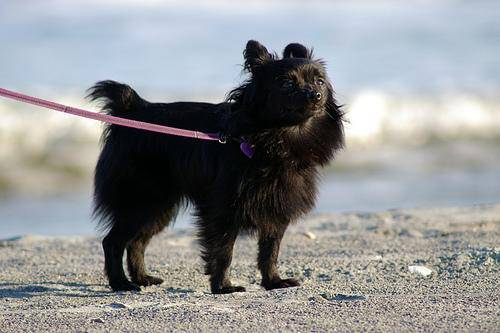

In [ ]:
# check a random sample from validation dataset
index = random.randint(0, len(y_val))
label = pred_labels(y_pred[index])

print(f'Is {label} predicted properly? Prediction: {pred_labels(y_val[index])}. So:  {label==pred_labels(y_val[index])}\n')

Image(X_val[index])

In [ ]:
# split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# create batches
# train data
train_data = create_batches(X_train, y_train)

# test data
valid_data = create_batches(X_val, y_val, valid_data=True)

print(len(X_train), len(X_val), len(y_train), len(y_val))

8177 2045 8177 2045


In [ ]:
model2 = train_model()

print('\nModel Summary:')
model.summary()

create a model with:  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1


Layer ModuleWrapper was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


Epoch 1/20
256/256 [==============================] - 26s 82ms/step - loss: 1.4797 - accuracy: 0.6450 - val_loss: 0.7034 - val_accuracy: 0.7932
Epoch 2/20
256/256 [==============================] - 19s 75ms/step - loss: 0.4065 - accuracy: 0.8875 - val_loss: 0.6553 - val_accuracy: 0.7966
Epoch 3/20
256/256 [==============================] - 19s 74ms/step - loss: 0.2316 - accuracy: 0.9411 - val_loss: 0.6627 - val_accuracy: 0.7941
Epoch 4/20
256/256 [==============================] - 20s 77ms/step - loss: 0.1460 - accuracy: 0.9695 - val_loss: 0.6446 - val_accuracy: 0.8073
Epoch 5/20
256/256 [==============================] - 19s 75ms/step - loss: 0.0984 - accuracy: 0.9845 - val_loss: 0.6711 - val_accuracy: 0.7985
Epoch 6/20
256/256 [==============================] - 19s 75ms/step - loss: 0.0715 - accuracy: 0.9901 - val_loss: 0.6715 - val_accuracy: 0.8049
Epoch 7/20
256/256 [==============================] - 17s 66ms/step - loss: 0.0525 - accuracy: 0.9950 - val_loss: 0.6832 - val_accuracy:

In [ ]:
y_pred = model2.predict(valid_data)

64/64 [==============================] - 4s 53ms/step


Is blenheim_spaniel predicted properly? Prediction: blenheim_spaniel. So:  True



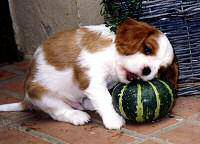

In [ ]:
# check a random sample from validation dataset
index = random.randint(0, len(y_val))
label = pred_labels(y_pred[index])

print(f'Is {label} predicted properly? Prediction: {pred_labels(y_val[index])}. So:  {label==pred_labels(y_val[index])}\n')

Image(X_val[index])